# Sample size Estimation for Atlas
This plot is to show the expected sample size based on expected correlation coefficients and a statistical power.

We demonstrate 5 different atlases to show how many different sample size is required under statistical power 0.95 (typically 0.8 for MRI analysis).
- AAL3 [[Tzourio-Mazoyer et al., 2019]](https://www.sciencedirect.com/science/article/abs/pii/S1053811901909784): 86 cortical regions + 84 subcortical regions
- Glasser atlas [[Glasser et al., 2016]](https://www.nature.com/articles/nature18933): 360 (180 /hemisphere)cortical regions
- Desikan2006[[Desikan et al., 2006]](https://www.ncbi.nlm.nih.gov/pubmed/16530430): 68 (34 /hemisphere) cortical regions
- Destrieux2009[[Destrieux et al., 2010]](https://www.sciencedirect.com/science/article/abs/pii/S1053811910008542?via%3Dihub): 148 (74 /hemisphere) corticl regions
- HarvardOxford Atlas[[Makris et al., 2006](https://www.ncbi.nlm.nih.gov/pubmed/16448806),[Frazier et al., 2006](https://www.ncbi.nlm.nih.gov/pubmed/15994707), [Desikan et al., 2006](https://www.ncbi.nlm.nih.gov/pubmed/16530430),[Goldstein et al., 2007](https://www.ncbi.nlm.nih.gov/pubmed/17046727)]: 48 cortical regions + 21 subcortical regions


For each of atlas, we try to calculate the numer of sample size for 
- voxel-based morphometry (VBM) x one behavioral parameter
- surface-based morphometry (SBM) x one behavioral parameter
- functional connectivity (FC) or structural connectivity (SC) x one behavioral parameter
- FC/SC x five behavioral parameter like big 5 personality tests

by Hiroaki Hamada, Araya Inc., 2020/03/06

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp
import seaborn as sns

# 1. Plotting all Atlas

In [2]:
#TestName = np.array(["VBM x 1Behav (AAL)", "SBM x 1Behav (AAL)", "FC/SC x 1Behav (AAL)", "FC/SC x 5Behav (AAL)",
#"VBM x 1Behav (Glasser2016)", "SBM x 1Behav (Glasser2016)", "FC/SC x 1Behav (Glasser2016)", "FC/SC x 5Behav (Glasser2016)",
#"VBM x 1Behav (Desikan2006)", "SBM x 1Behav (Desikan2006)", "FC/SC x 1Behav (Desikan2006)", "FC/SC x 5Behav (Desikan2006)",
#"VBM x 1Behav (Destrieux2009)", "SBM x 1Behav (Destrieux2009)", "FC/SC x 1Behav (Destrieux2009)", "FC/SC x 5Behav (Destrieux2009)", 
#"VBM x 1Behav (HarvardOxford)", "SBM x 1Behav (HarvardOxford)", "FC/SC x 1Behav (HarvardOxford)", "FC/SC x 5Behav (HarvardOxford)"]);
TestName = np.array(["VBM x 1Behav (AAL)", "SBM x 1Behav (AAL)",
"VBM x 1Behav (Glasser2016)", "SBM x 1Behav (Glasser2016)",
"VBM x 1Behav (Desikan2006)", "SBM x 1Behav (Desikan2006)",
"VBM x 1Behav (Destrieux2009)", "SBM x 1Behav (Destrieux2009)", 
"VBM x 1Behav (HarvardOxford)", "SBM x 1Behav (HarvardOxford)",
"FC/SC x 1Behav (AAL)","FC/SC x 5Behav (AAL)",
"FC/SC x 1Behav (Glasser2016)", "FC/SC x 5Behav (Glasser2016)",
"FC/SC x 1Behav (Destrieux2009)", "FC/SC x 5Behav (Destrieux2009)",
 "FC/SC x 1Behav (Desikan2006)", "FC/SC x 5Behav (Desikan2006)", 
"FC/SC x 1Behav (HarvardOxford)", "FC/SC x 5Behav (HarvardOxford)"]);
TestCategory = np.array(range(20))
TestSize = np.array([170, 342, 360, 1080, 68, 204, 148, 444, 69, 165, 
14365, 71825, 64620, 323100, 2278, 11390, 10878, 54390, 2346, 11730]);
TestCategory = np.array(range(20))
#TestSize = np.array([170, 342, 14365, 71825, 360, 1080, 64620, 323100, 68, 204, 2278, 11390, 148, 444, 10878, 54390, 69, 165, 2346, 11730]);
nTest = len(TestSize);

## Power = 0.8; 
Power = 0.95;
Corr = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1];
# calculate No. Sample size for all atlas
RequiredSampleSize = np.array([smp.NormalIndPower().solve_power(np.arctanh(r), alpha=0.05/ts, ratio = 0,
            power= Power, alternative='two-sided') + 3 for r in Corr for ts in TestSize]);
TestSizeAll = np.concatenate([TestSize for t in range(len(Corr))])
AtlasAll = np.concatenate([TestName for t in range(len(Corr))])
# make dataFrame
d = {'TestSize': TestSizeAll, 'SampleSize': RequiredSampleSize, 'Analysis':AtlasAll};
df = pd.DataFrame(d);

In [3]:
## 1 ~ 10^6
NoTestSize2 = np.array([10**ii for ii in np.arange(0, 6.1, 0.2)]);

# for different pvalues
RequiredSampleSize2 = np.array([smp.NormalIndPower().solve_power(np.arctanh(r), alpha=0.05/ts, ratio = 0,
            power= Power, alternative='two-sided') + 3 for r in Corr for ts in NoTestSize2 ]);

TestSizeAll2 = np.concatenate([NoTestSize2 for t in range(len(Corr))])
TestCorrAll = ['r = ' + str(ii) for ii in Corr for t in NoTestSize2];

d2 = {'TestSize': TestSizeAll2, 'SampleSize': RequiredSampleSize2, 'correlation coeff':TestCorrAll};
df2 = pd.DataFrame(d2);

/Users/hamadataiyou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


[None, None, None, None, None, None, None]

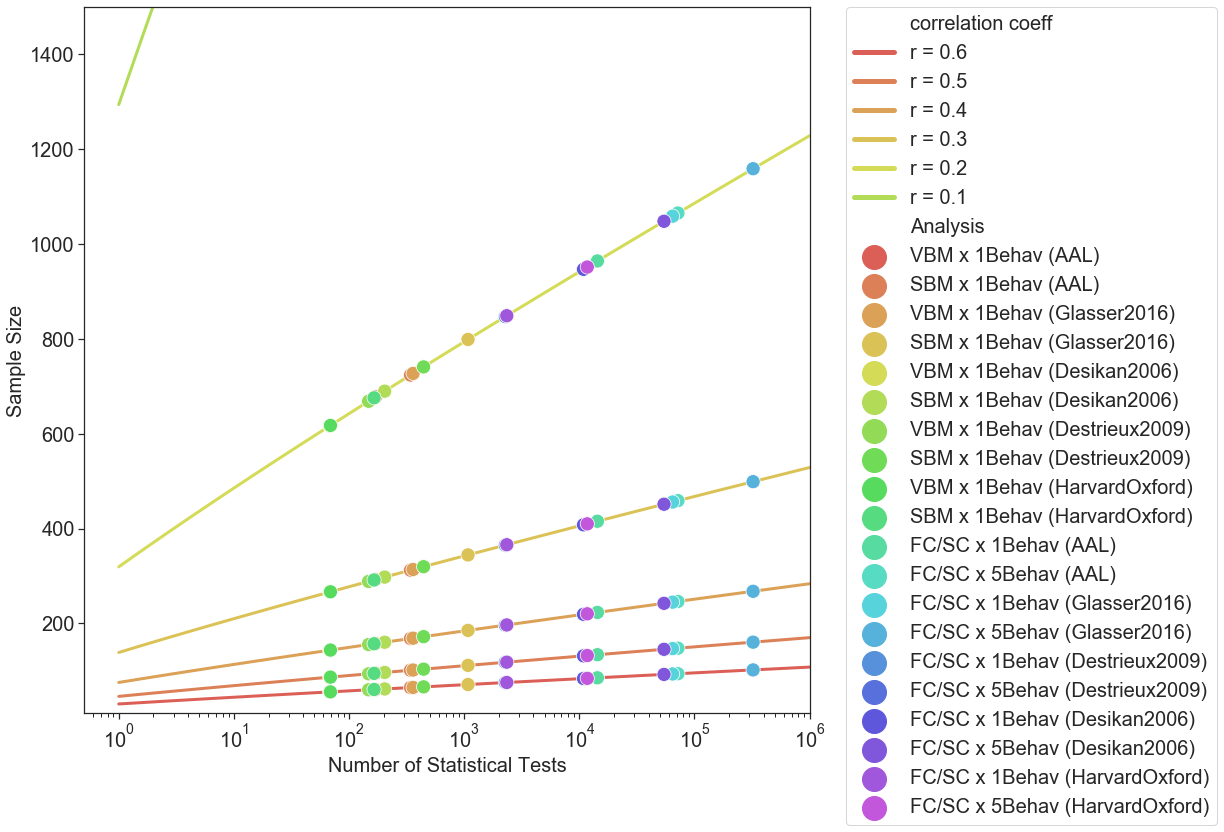

In [4]:
# plotting
sns.set()
sns.set_style('ticks')
sns.set_palette('hls', 24)
fig = plt.figure (figsize = (13,13))
ax = fig.add_subplot(1,1,1)
sns.lineplot(data=df2, x='TestSize', y='SampleSize',hue='correlation coeff',zorder=1,linewidth=3)
sns.scatterplot(data=df, x='TestSize', y='SampleSize',hue='Analysis',s=200,zorder=2)
ax.set_xscale("log")
ax.set(xlim=(0,1000000),ylim=(10,1500))
ax.set_ylabel('Sample Size', fontsize = 20)
ax.set_xlabel('Number of Statistical Tests', fontsize = 20)
leg=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20,markerscale=4)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.tick_params(axis='x', which='major', labelsize=20)
leg_lines = leg.get_lines()
plt.setp(leg_lines, linewidth=5)

# 2. Sample size estimation based on Atlas for VBM + SBM

In [5]:
TestOnly = np.array(["VBM x 1Behav (AAL)", "SBM x 1Behav (AAL)", 
"VBM x 1Behav (Glasser2016)", "SBM x 1Behav (Glasser2016)",
"VBM x 1Behav (Desikan2006)", "SBM x 1Behav (Desikan2006)", 
"VBM x 1Behav (Destrieux2009)", "SBM x 1Behav (Destrieux2009)", 
"VBM x 1Behav (HarvardOxford)", "SBM x 1Behav (HarvardOxford)"]);

TestSizeOnly = np.array([170, 342, 360, 1080, 68, 204, 148, 444, 69, 165]);
nTest = len(TestSizeOnly);

Power = 0.95;
Corr2 = [0.6, 0.5, 0.4, 0.3, 0.2];

TestCorrAll = ['r = ' + str(ii) for ii in Corr2 for t in TestSizeOnly];
RequiredSampleSizeOnly = np.array([smp.NormalIndPower().solve_power(np.arctanh(r), alpha=0.05/ts, ratio = 0,
            power= Power, alternative='two-sided') + 3 for r in Corr2 for ts in TestSizeOnly]);

TestSizeOnly = np.concatenate([TestSizeOnly for t in range(len(Corr2))]);
AtlasOnly = np.concatenate([TestOnly for t in range(len(Corr2))])

d4 = {'TestSize': TestSizeOnly, 'SampleSize': RequiredSampleSizeOnly, 'Analysis':AtlasOnly};
df4 = pd.DataFrame(d4);

In [6]:
## 1 ~ 10^6
TestSizeOnly2 = np.array([10**ii for ii in np.arange(0, 6.1, 0.2)]);

# for different pvalues
RequiredSampleSizeOnly2 = np.array([smp.NormalIndPower().solve_power(np.arctanh(r), alpha=0.05/ts, ratio = 0,
            power= Power, alternative='two-sided') + 3 for r in Corr2 for ts in TestSizeOnly2 ]);

TestCorrOnly2 = ['r = ' + str(ii) for ii in Corr2 for t in TestSizeOnly2];
TestSizeOnly2 = np.concatenate([TestSizeOnly2  for t in range(len(Corr2))])

d3 = {'TestSize': TestSizeOnly2, 'SampleSize': RequiredSampleSizeOnly2, 'correlation coeff':TestCorrOnly2};
df3 = pd.DataFrame(d3);

[None, None, None, None, None, None]

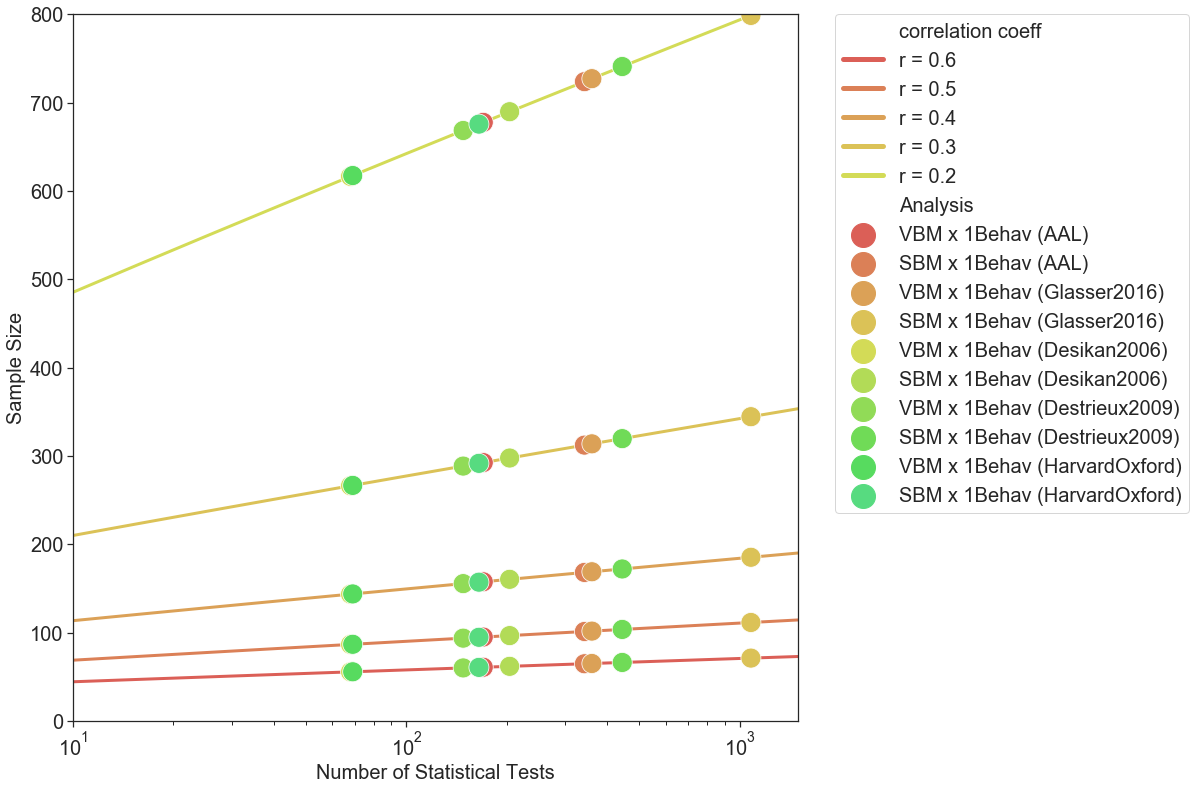

In [7]:
# plotting
sns.set()
sns.set_palette('hls', 24)
sns.set_style('ticks')
fig = plt.figure (figsize = (13,13))
ax = fig.add_subplot(1,1,1)
sc3 = sns.lineplot(data=df3, x='TestSize', y='SampleSize',hue='correlation coeff',zorder=1,linewidth=3)
sc4 = sns.scatterplot(data=df4, x='TestSize', y='SampleSize',hue='Analysis',zorder=2,s=400)
ax.set_xscale("log")
ax.set(xlim=(10,1500),ylim=(0,800))
ax.set_ylabel('Sample Size', fontsize = 20)
ax.set_xlabel('Number of Statistical Tests', fontsize = 20)
leg=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20,prop={'size':20},markerscale=4)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.tick_params(axis='x', which='major', labelsize=20)
leg_lines = leg.get_lines()
plt.setp(leg_lines, linewidth=5)